<H1>K-means clustering (KMC) algorithm </H1>
<p>
Author: Jose Guzman, sjm.guzman@gmail.com
</p>
<P>
Given a set $X$ of $n$ observations; $X = \{x_1, x_2, \cdots, x_n\}$, where every $i$ observation is a vector of measurements ($x_i \in R^d$). The K-means clustering aims to classify the observations into a set of $k$ clusters $C =\{c_1, c_2, \cdots, c_k\}$ that minimized the following expression:
</P>

http://mnemstudio.org/clustering-k-means-example-1.htm


In [1]:
%pylab inline
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from scipy.spatial import distance

Populating the interactive namespace from numpy and matplotlib


Consider the following data set consisting of the scores of two variables on each of seven experiments

In [2]:
x = np.array([[1.0, 1.0], [1.5 ,2.0], [3.0, 4.0], [5.0, 7.0],[3.5, 5.0],[4.5, 5.0],[3.5, 4.5]])
x.shape
print(x.shape)
print(x)

(7, 2)
[[ 1.   1. ]
 [ 1.5  2. ]
 [ 3.   4. ]
 [ 5.   7. ]
 [ 3.5  5. ]
 [ 4.5  5. ]
 [ 3.5  4.5]]


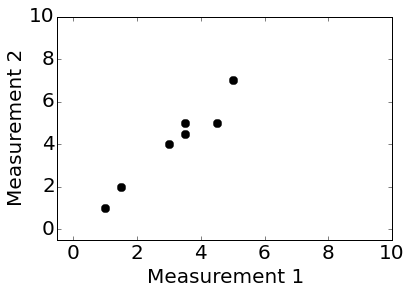

In [3]:
# Plot 2 measurements
for i in x:
    plt.plot(i[0],i[1], 'ko', markersize=8);
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1', fontsize=20);
plt.ylabel('Measurement 2', fontsize=20);

This data set is to be grouped into two clusters. 
As a first step in finding a sensible initial partition, let the values of the measurements 1 and 2 of the two individuals furthest apart (using the Euclidean distance measure), define the initial cluster means, giving:


In [4]:
centroid1 = x[0] 
centroid2 = x[3]
print(centroid1, centroid2)

(array([ 1.,  1.]), array([ 5.,  7.]))


In [5]:
# calculate Euclidean distances from centroid 1
sample1= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid1)
    sample1.append(dist)
    print("%d -> %f" %(i, dist))

0 -> 0.000000
1 -> 1.118034
2 -> 3.605551
3 -> 7.211103
4 -> 4.716991
5 -> 5.315073
6 -> 4.301163


In [6]:
# calculate Euclidean distances from centroid 2
sample2 = list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid2)
    sample2.append(dist)
    print("%d -> %f" %(i, dist))

0 -> 7.211103
1 -> 6.103278
2 -> 3.605551
3 -> 0.000000
4 -> 2.500000
5 -> 2.061553
6 -> 2.915476


In [7]:
group1 = x[np.array(sample1)<=np.array(sample2)]
print(group1)

[[ 1.   1. ]
 [ 1.5  2. ]
 [ 3.   4. ]]


In [8]:
group2 = x[np.array(sample2)<np.array(sample1)]
print(group2)

[[ 5.   7. ]
 [ 3.5  5. ]
 [ 4.5  5. ]
 [ 3.5  4.5]]


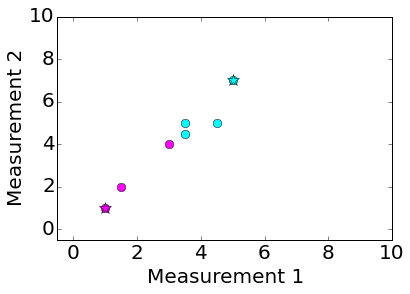

In [9]:
# Replot first categorization
# Plot 2 measurements
for i in group1:
    plt.plot(i[0],i[1], 'o', markersize=8, color='magenta');
for i in group2:
    plt.plot(i[0],i[1], 'o', markersize=8, color='cyan');
plt.plot(centroid1[0], centroid1[1], '*', color='magenta', ms=12)
plt.plot(centroid2[0], centroid2[1], '*', color='cyan', ms=12)
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1', fontsize=20);
plt.ylabel('Measurement 2', fontsize=20);

In [10]:
# recalculate centroids
centroid1 = np.average(group1, axis=0)
centroid2 = np.average(group2, axis=0)
print(centroid1, centroid2)

(array([ 1.83333333,  2.33333333]), array([ 4.125,  5.375]))


In [11]:
# calculate Euclidean distances from new centroid 1
sample1= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid1)
    sample1.append(dist)
    print("%d -> %f" %(i, dist))

0 -> 1.572330
1 -> 0.471405
2 -> 2.034426
3 -> 5.639641
4 -> 3.144660
5 -> 3.771236
6 -> 2.733537


In [12]:
sample2= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid2)
    sample2.append(dist)
    print("%d -> %f" %(i, dist))

0 -> 5.376453
1 -> 4.275658
2 -> 1.776584
3 -> 1.845603
4 -> 0.728869
5 -> 0.530330
6 -> 1.075291


In [13]:
# reasign the groups
group1 = x[np.array(sample1)<=np.array(sample2)]
print(group1)


[[ 1.   1. ]
 [ 1.5  2. ]]


In [14]:
group2 = x[np.array(sample2)<np.array(sample1)]
print(group2)

[[ 3.   4. ]
 [ 5.   7. ]
 [ 3.5  5. ]
 [ 4.5  5. ]
 [ 3.5  4.5]]


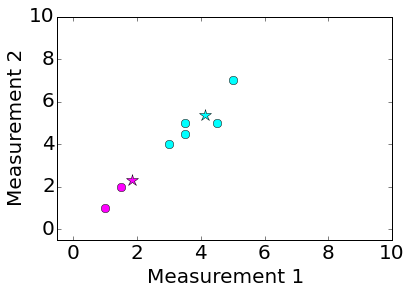

In [15]:
# Replot first categorization with new centrodis
# Plot 2 measurements
for i in group1:
    plt.plot(i[0],i[1], 'o', markersize=8, color='magenta');
for i in group2:
    plt.plot(i[0],i[1], 'o', markersize=8, color='cyan');
plt.plot(centroid1[0], centroid1[1], '*', color='magenta', ms=12)
plt.plot(centroid2[0], centroid2[1], '*', color='cyan', ms=12)
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1', fontsize=20);
plt.ylabel('Measurement 2', fontsize=20);

In [16]:
# recalculate centroids
centroid1 = np.average(group1, axis=0)
centroid2 = np.average(group2, axis=0)
print(centroid1, centroid2)

(array([ 1.25,  1.5 ]), array([ 3.9,  5.1]))


In [17]:
# calculate Euclidean distances from new centroid 1
sample1= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid1)
    sample1.append(dist)

# calculate Euclidean distances from centroid 2
sample2 = list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid2)
    sample2.append(dist)

# reasign the groups
group1 = x[np.array(sample1)<=np.array(sample2)]

group2 = x[np.array(sample2)<np.array(sample1)]


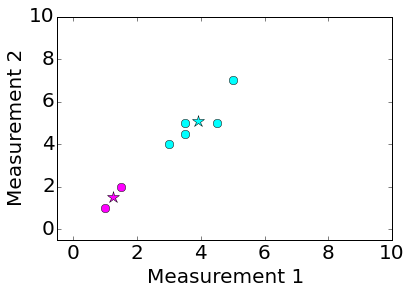

In [18]:
# Replot first categorization with new centrodis
# Plot 2 measurements
for i in group1:
    plt.plot(i[0],i[1], 'o', markersize=8, color='magenta');
for i in group2:
    plt.plot(i[0],i[1], 'o', markersize=8, color='cyan');
plt.plot(centroid1[0], centroid1[1], '*', color='magenta', ms=12)
plt.plot(centroid2[0], centroid2[1], '*', color='cyan', ms=12)
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1', fontsize=20);
plt.ylabel('Measurement 2', fontsize=20);

In [19]:
# recalculate centroids
centroid1 = np.average(group1, axis=0)
centroid2 = np.average(group2, axis=0)
print(centroid1, centroid2)

(array([ 1.25,  1.5 ]), array([ 3.9,  5.1]))
